# Comparison to analytic solution

 Use python pandas modules to load data, use matplotlib to plot the results. Write a python modules for the analytic reference solution between two disks, put it into the modules folder and import it here. You can also write latex formula here if required $a^2 + b^2 = c^2$.
 
# Theory of the analytical solution

 The system describes the flow between two finite disks(Radius = $R$) enclosed by a cylinder. The top disk is rotating with a constant angular velocity $\Omega$, while the bottom disk and the side wall are held fix. The dimensionless Navier-Stokes equations for this flow in the cylindycal coordinate system $(r', \phi', z')$ are,<p>
 $u\frac{\partial \Gamma}{\partial r}+w\frac{\partial \Gamma}{\partial z} = (Re)^{-1}(\nabla^2 \Gamma - \frac{2}{r}\frac{\partial \Gamma}{\partial r}) \tag{1}$
 $u\frac{\partial \zeta}{\partial r}+w\frac{\partial \zeta}{\partial z} -\frac{u\zeta}{r} - \frac{2\Gamma}{r^3}\frac{\partial \Gamma}{\partial z}= (Re)^{-1}(\nabla^2 \zeta - \frac{\zeta}{r^2}) \tag{2}$
 $\nabla^2 \psi - \frac{2}{r} \frac{\partial \psi}{\partial r} = r\zeta \tag{3}$
 where
 $\Gamma = vr\tag{4}$
 $\zeta = \frac{\partial u}{\partial z} - \frac{\partial w}{\partial r}\tag{5}$
 $Re = \frac{\Omega R^2}{\nu}\tag{6}$
 $\nabla^2 = \frac{\partial^2}{\partial r^2} + r^{-1}\frac{\partial}{\partial r} + \frac{\partial^2}{\partial z^2}\tag{7}$
 with 
 $u = r^{-1}\frac{\partial \psi}{\partial z}\tag{8}$
 $w = -r^{-1}\frac{\partial \psi}{\partial r}\tag{9}$
 in which the following variables are defined to be dimensionless by:
 $z = \frac{z'}{R}\tag{10}$
 $r = \frac{r'}{R}\tag{11}$
 $u = \frac{U}{\Omega R}\tag{12}$
 $v = \frac{V}{\Omega R}\tag{13}$
 where (U, V, W) are the components of the velocity field.
    
 For the case with $Re<10$, it is observed that:
 $u \ll 1, w \ll 1, \Gamma \sim1$. Thus Eqs. (1)-(3) can be reduced to:
 $\nabla^2 \Gamma - \frac{2}{r}\frac{\partial \Gamma}{\partial r} = 0\tag{14}$
 $\nabla^2 \zeta - \frac{\zeta}{r^2} = -\frac{2\Gamma}{r^3}\frac{\partial \Gamma}{\partial z}Re\tag{15}$  
 $\nabla^2 \psi - \frac{2}{r}\frac{\partial \psi}{\partial r} = r\zeta\tag{16}$
 Since the bottom stationary disk is at $z = 0$ while the top rotating disk is at $z = \beta$ where $\beta = \frac{H}{R}$ donates the ratio of the height to the radius of the wedge, the boundary conditions are
 $\Gamma(0,z) = 0 \tag{17}$
 $\Gamma(r,0) = 0 \tag{18}$
 $\Gamma(r,\beta) = r^2 \tag{19}$ 
 $\Gamma(1,z) = 0 \tag{20}$
 Therefore the solution is 
 $v = \frac{\Gamma}{r} = \sum_{n = 1}^{\infty}2\frac{J_1(\alpha_n r)sinh(-\alpha_n z)}{\alpha_n sinh(\alpha_n \beta)J_0(\alpha_n)}\tag{21}$
 where $\alpha_n$ is the $n$th positive zero of the Bessel function $J_1$. According to eqation (13), the required analytic solution of $v_{\phi}(r)$ is expressed as 
 $v_{\phi}(r) = \Omega R\sum_{n = 1}^{\infty}2\frac{J_1(\alpha_n r)sinh(-\alpha_n z)}{\alpha_n sinh(\alpha_n \beta)J_0(\alpha_n)}\tag{22}$
    
### REFERENCES
 PAO, H. P. 1972 Numerical solution of the Navier-Stokes equations for flows in the disk-cylinder system. Phys. Fluids 15, 4-11. 

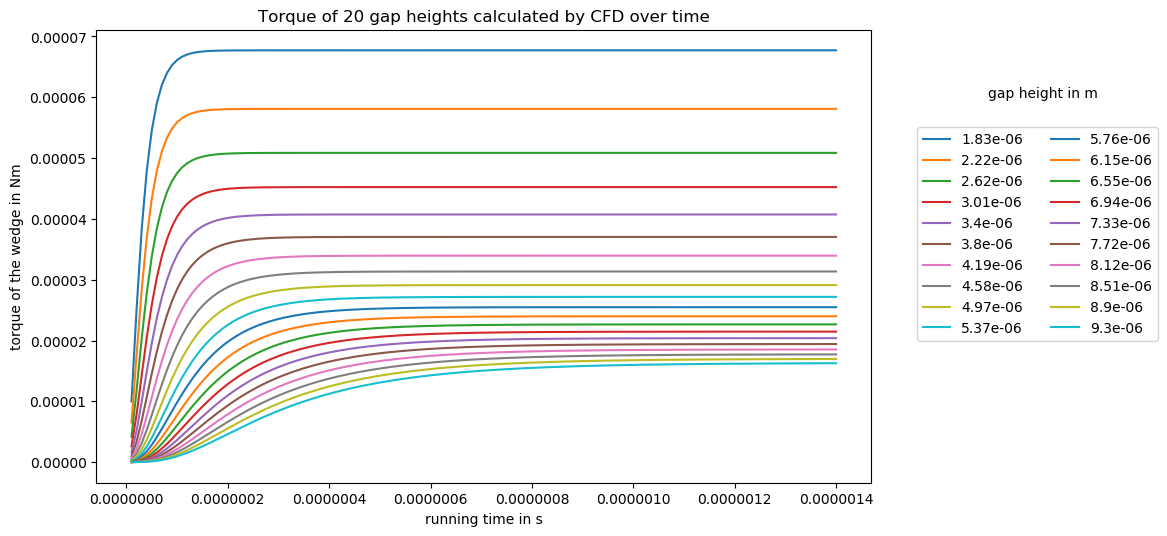

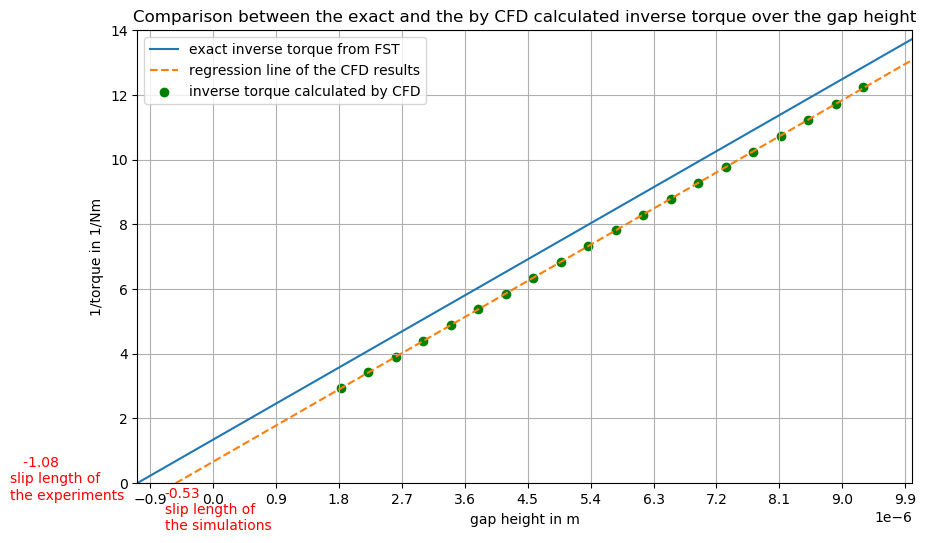

In [73]:
%matplotlib inline 
# this above line is required to show plots here
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
import sys, os
import csv

# make the modules available
sys.path.insert(1, os.getcwd() + '/../modules/')
import analytic.rotatingDiscsFlow as rdf

# constants
R = 32e-3  #1e-3
lambda1 = 0.54e-6                                      #slip length of the upper interface
lambda2 = 0.54e-6                                      #slip length of the lower interface
mu = 0.039                                             #dynamic viscosity
nu = 4.7104e-5                                         #kinematic viscosity
rho = 828                                              #density of PAO6
omega = 4*math.pi                                      #angular velocity
r = np.linspace(0,R,200)/R                             #dimensionless r 
H_series_plot = np.linspace(-1.08e-6, 10e-6, 5000)     #gap height for plotting
H_series = np.linspace(1.831e-6, 9.296e-6, 20)         #gap heights of the 20 measurements 


cases = ['../partialSlipStudy/'] #, '../caseFST3'
parameter_study_item = 'mesh-convergence_00'
path_add = 'postProcessing/sampleLine'
csv_path_add = 'data_U.csv'
dat_path_add = 'postProcessing/forces/0/moment.dat'
velocity_cfd = []
torque_cfd_20_cases = []

#show the convergence of the torque over time
fig1= plt.figure(dpi=100, figsize=(10,6))
plt.title('Torque of 20 gap heights calculated by CFD over time')
plt.xlabel('running time in s')
plt.ylabel('torque of the wedge in Nm')
plt.text(1.7e-6, 6e-5, 'gap height in m')

# read cfd results
for case in cases:
    
    items = sorted(os.listdir(case))
    for item in items:
        if parameter_study_item in item:
            #read the sampled velocity
            case_path = os.path.join(case, item, path_add)
            max_time_step = str(max(map(eval, os.listdir(case_path))))
            csv_path = os.path.join(case_path, max_time_step, csv_path_add)
            velocity_cfd = np.append(velocity_cfd, pd.read_csv(csv_path)['U_1'])
            
            #read the calculated torque
            dat_path = os.path.join(case, item, dat_path_add)
            cfd_torque = pd.DataFrame(pd.read_csv(dat_path ,header=None, skiprows=3, encoding="utf-8",delimiter="\t",quoting=csv.QUOTE_NONE))
            time = cfd_torque[0][1::].astype("float")
            torque_item = cfd_torque[1].str.split(" ").str[2].str.split(")").str[0][1::].astype('float')
            torque_cfd_20_cases = np.append(torque_cfd_20_cases, torque_item[len(torque_item)])
            plt.plot(time, torque_item)
plt.legend(np.around(H_series,decimals = 8), bbox_to_anchor=(1.05, 0.8), ncol = 2)
  
#calculate the inverse torque of the entire disk
torque_cfd_disk_inverse = 1/torque_cfd_20_cases*(0.04/32/2/math.pi)
#create regression lines for the sampling
regression_torque = np.poly1d(np.polyfit(H_series, torque_cfd_disk_inverse, 1)) 
#exact inverse torque(FST Paper)
torque_exact_FST_inverse = 2*(H_series_plot+lambda1+lambda2)/(mu*omega*math.pi*R**4)  

for i in range(len(H_series_plot)-1):
    if regression_torque(H_series_plot[i])*regression_torque(H_series_plot[i+1])<=0:
        slipLength = (H_series_plot[i]+H_series_plot[i+1])/2   #calculate the slip length of the cfd results
        
# show the torque results of 20 cfd simulations and the comparison
fig2 = plt.figure(dpi=100, figsize=(10,6))
plt.plot(H_series_plot, torque_exact_FST_inverse)
plt.scatter(H_series, torque_cfd_disk_inverse, color = 'green')
plt.plot(H_series_plot, regression_torque(H_series_plot), '--')
plt.text(slipLength*1.3, -1.45, '%.2f\nslip length of\nthe simulations'%(slipLength/(1e-6)), color = 'r')
plt.text(-2.9e-6, -0.5, '   -1.08\nslip length of\nthe experiments', color = 'r')
plt.xlim([-1.08e-6, 10e-6])
plt.ylim([0,14])
ax = plt.gca()  
ax.xaxis.get_major_formatter().set_powerlimits((0,1))
ax.xaxis.set_major_locator(plt.MultipleLocator(9e-7))
plt.xlabel("gap height in m")
plt.ylabel("1/torque in 1/Nm")
plt.title('Comparison between the exact and the by CFD calculated inverse torque over the gap height')
plt.legend(['exact inverse torque from FST (equation 13)', 'regression line of the CFD results', 'inverse torque calculated by CFD'])
plt.grid()

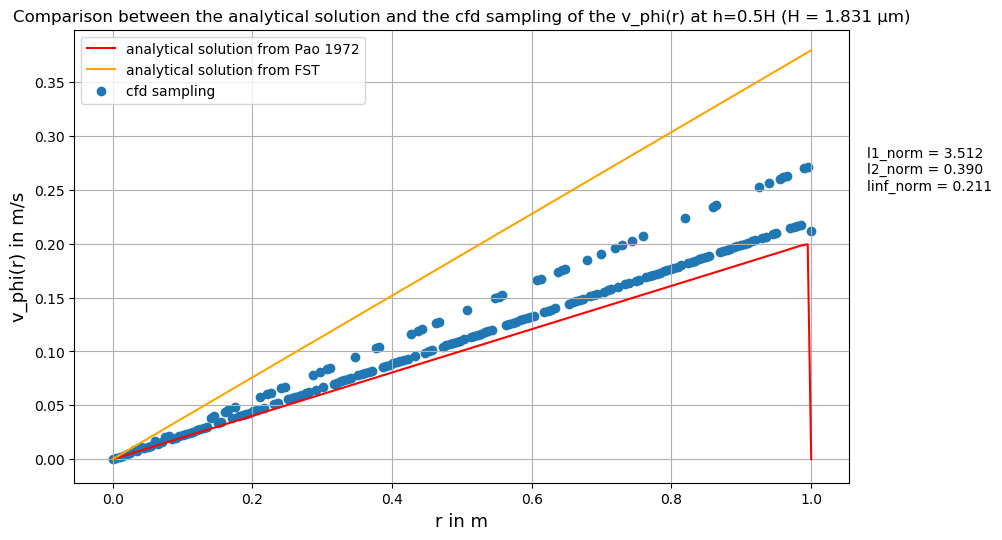

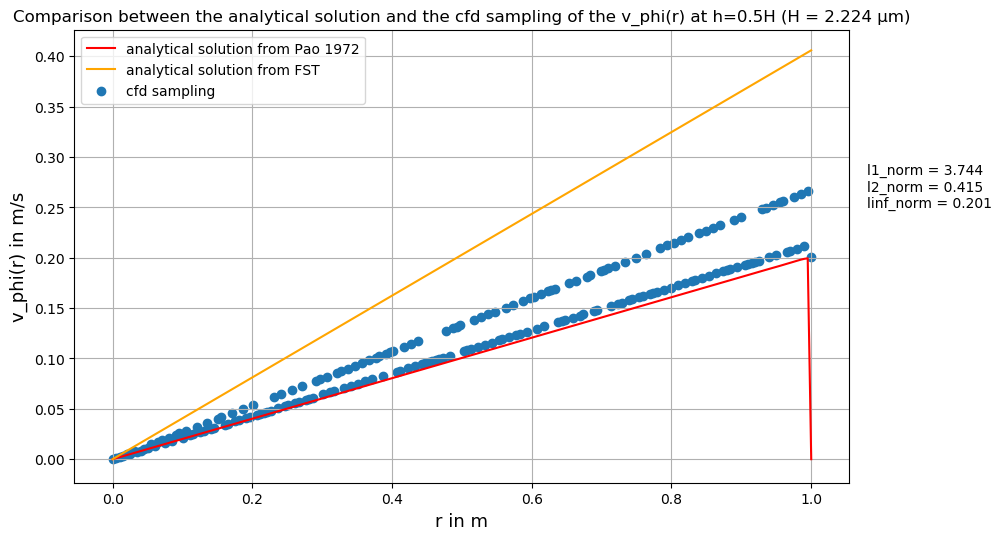

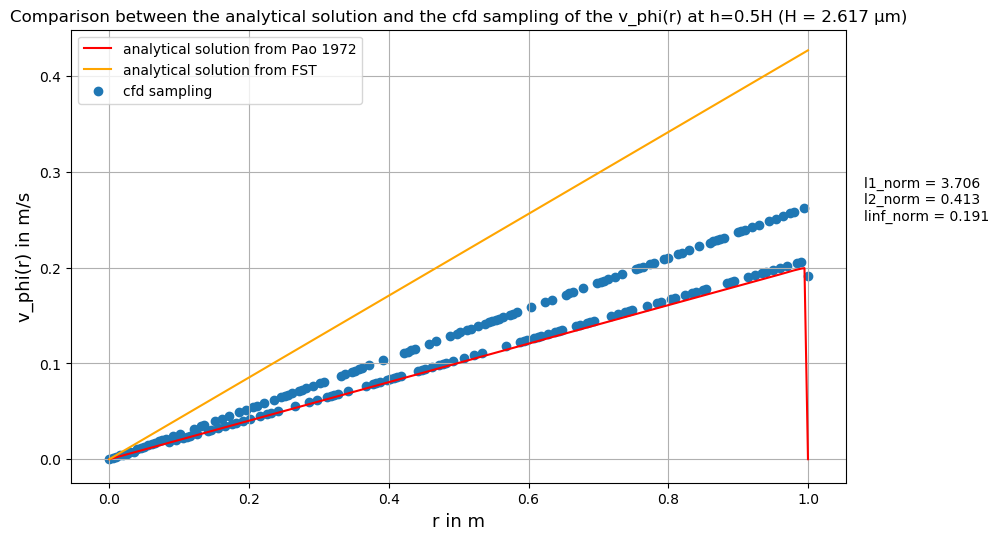

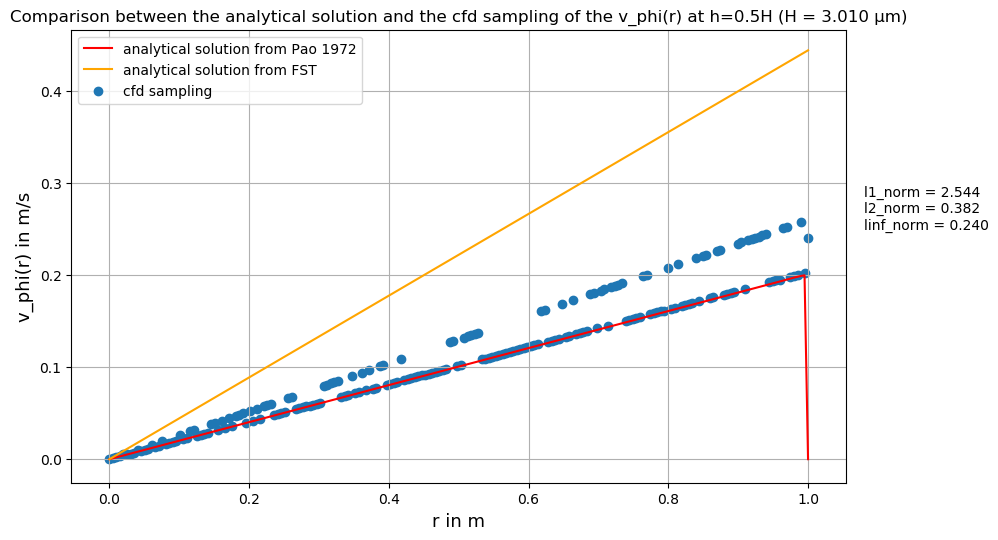

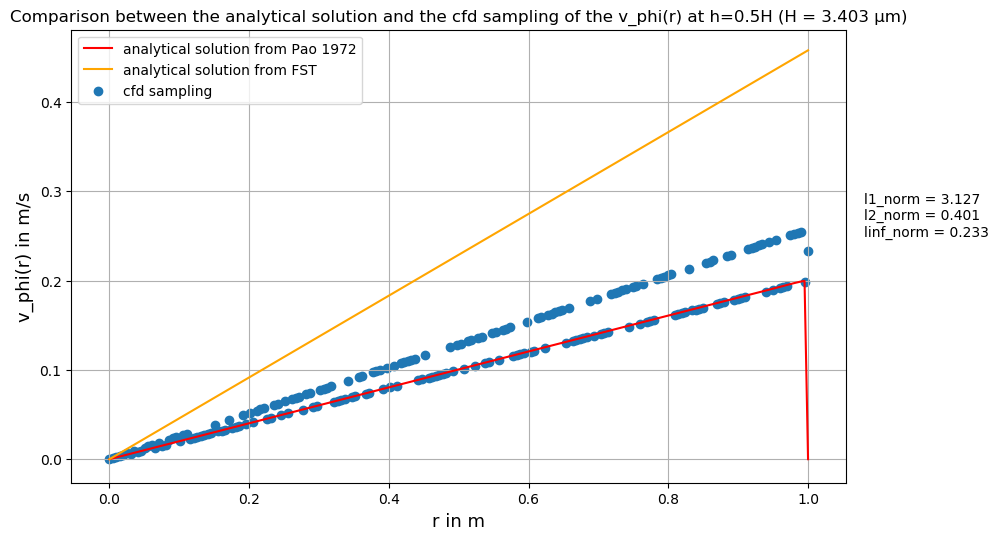

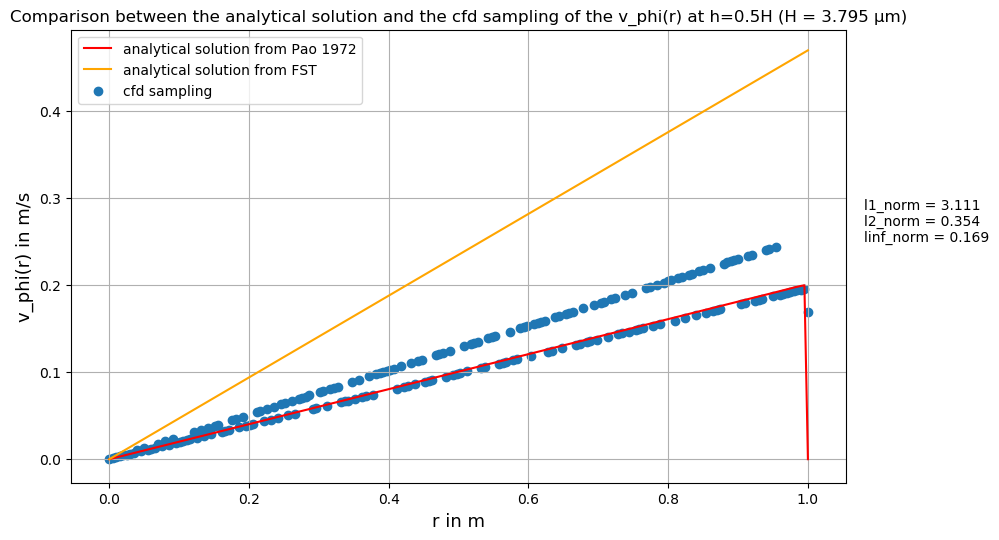

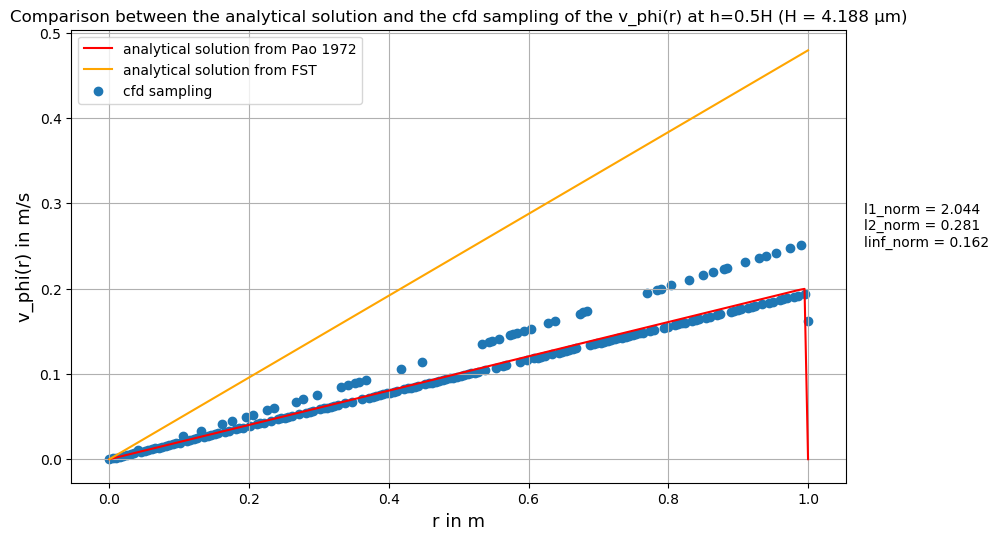

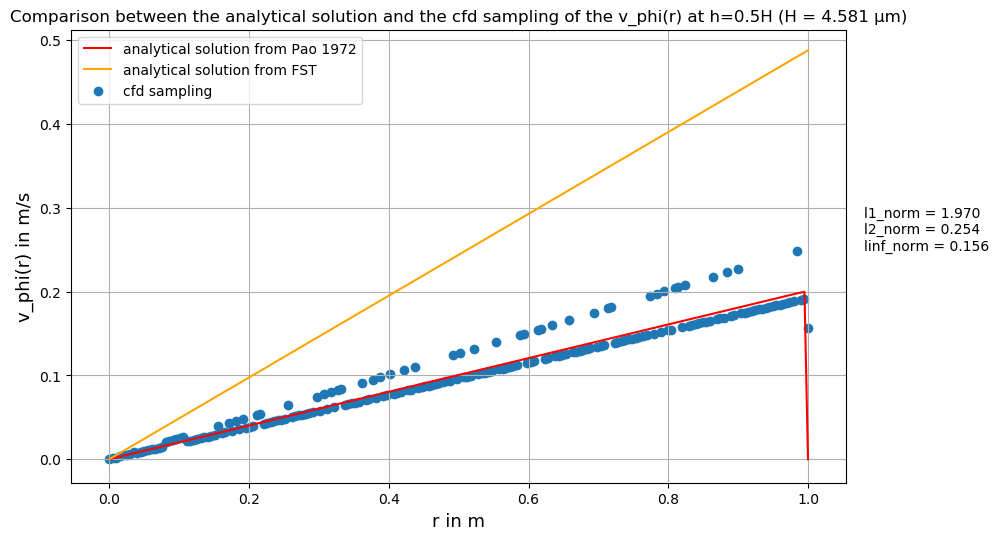

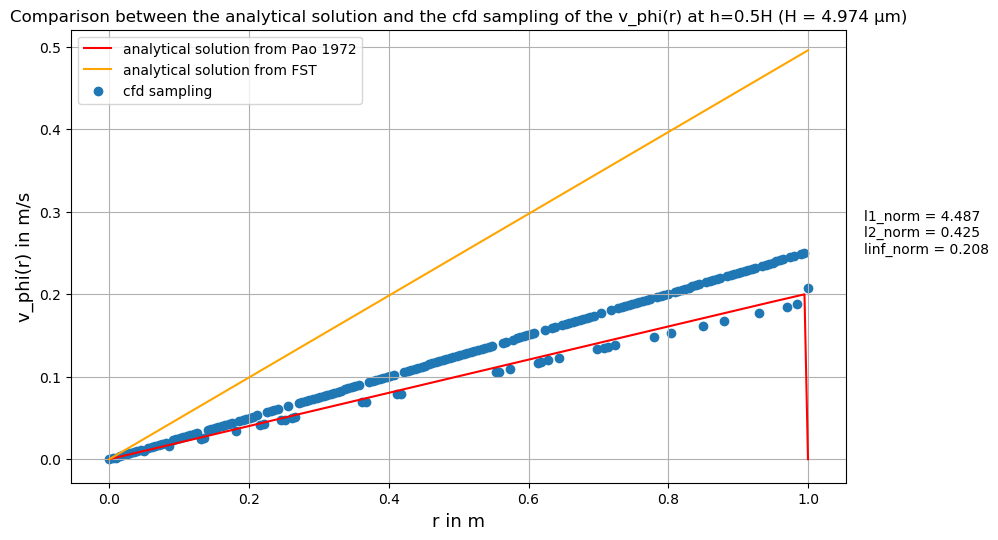

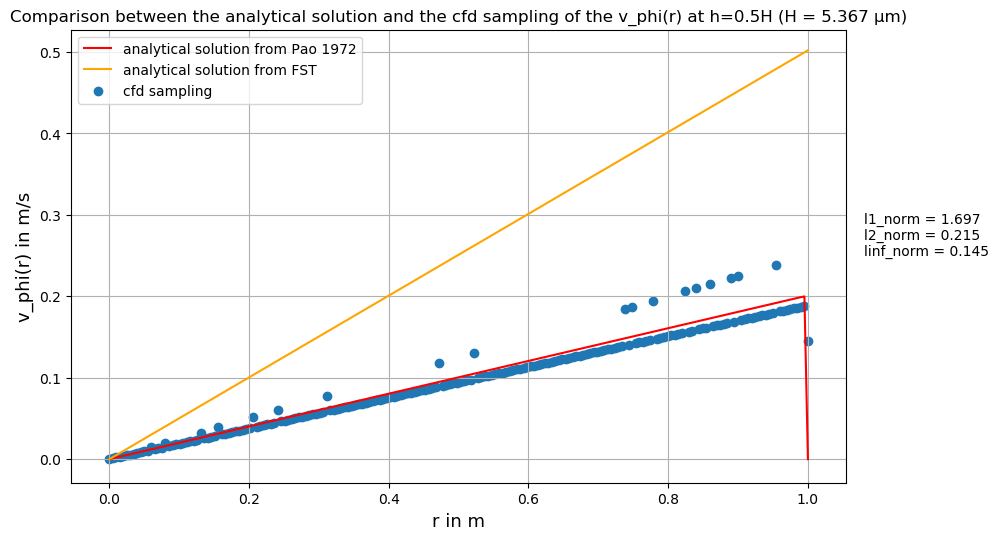

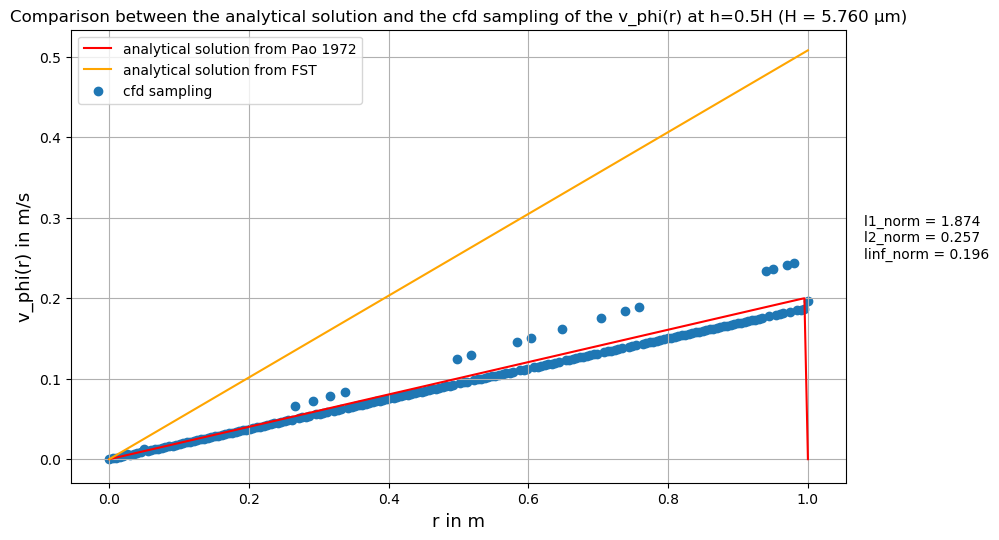

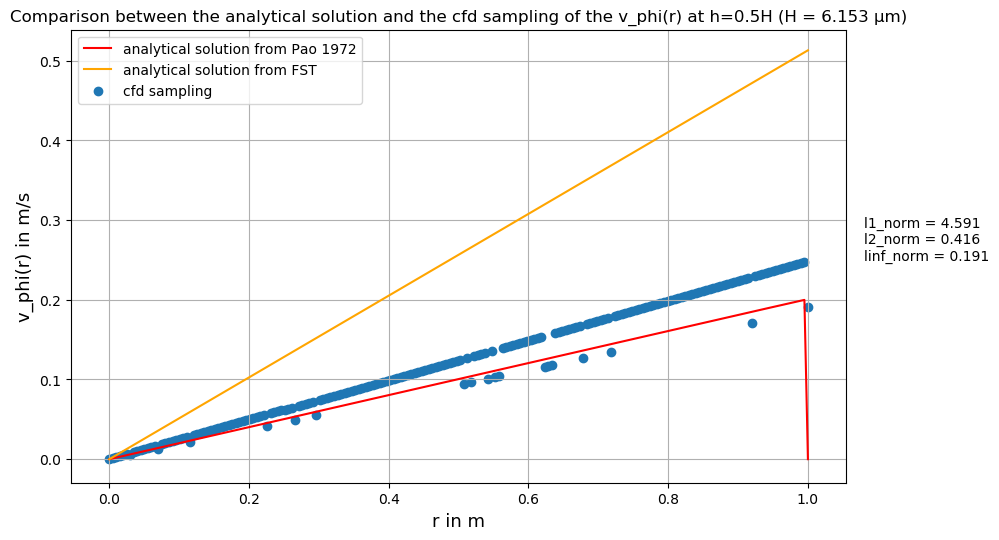

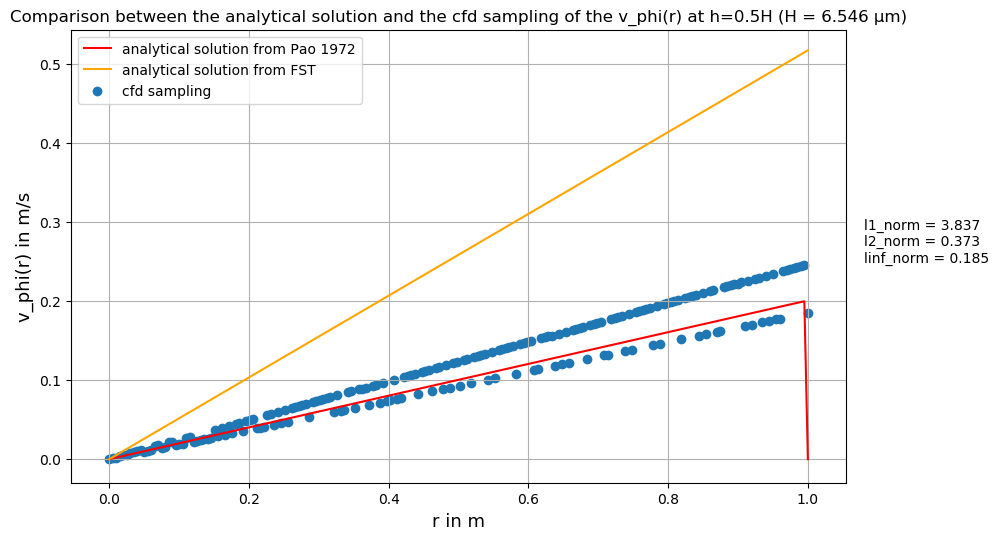

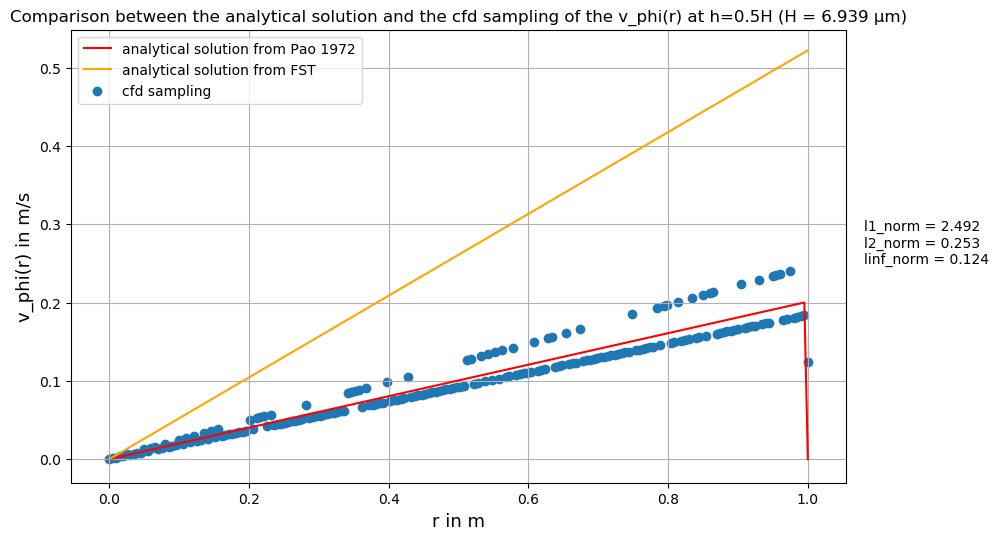

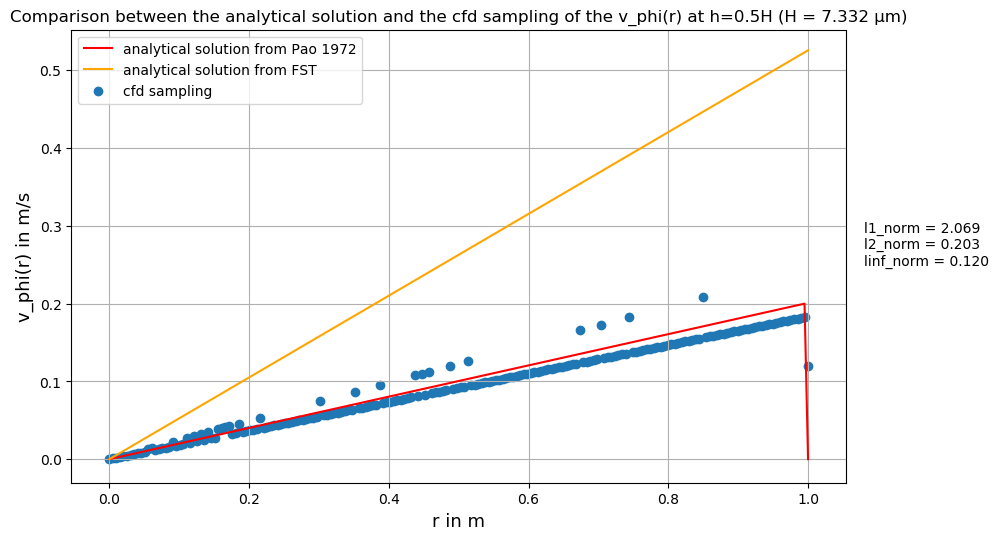

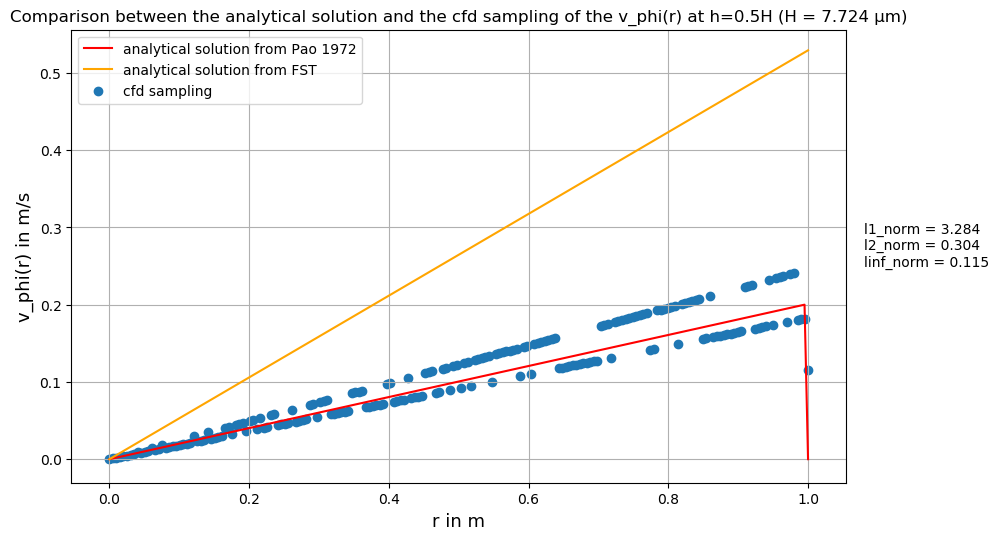

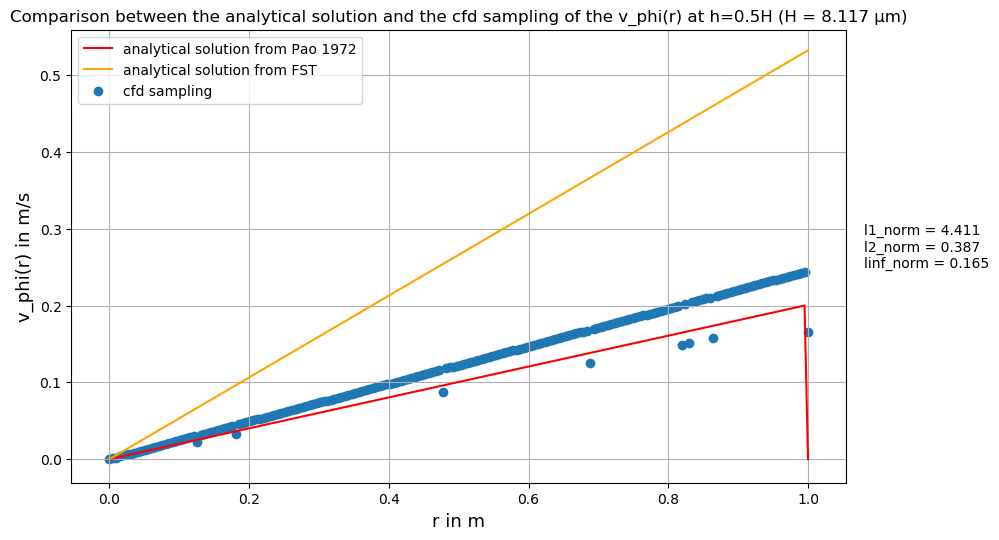

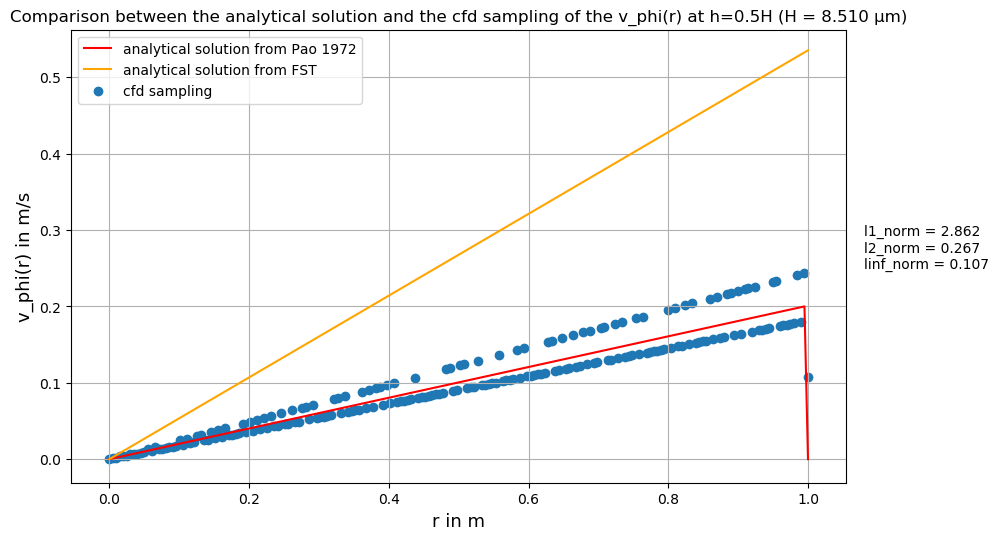

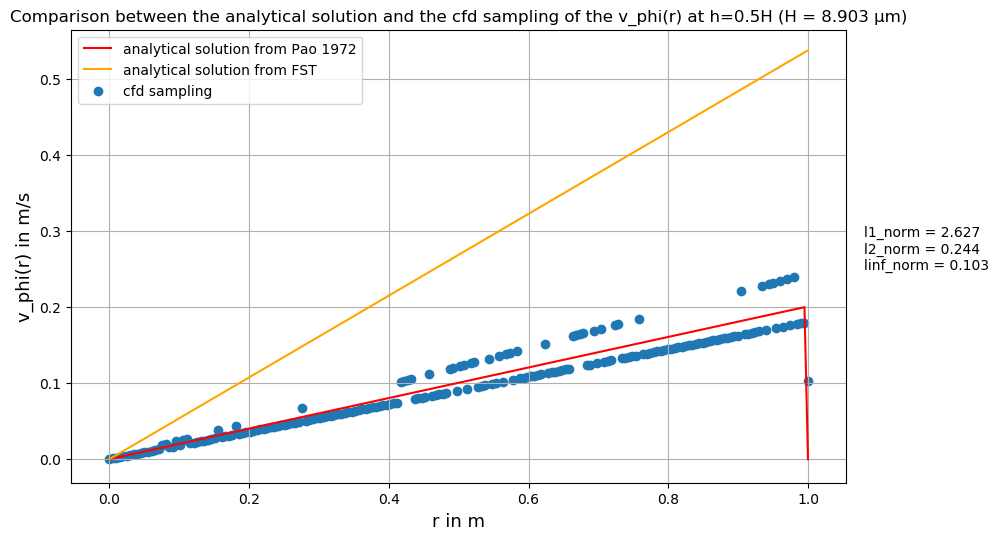

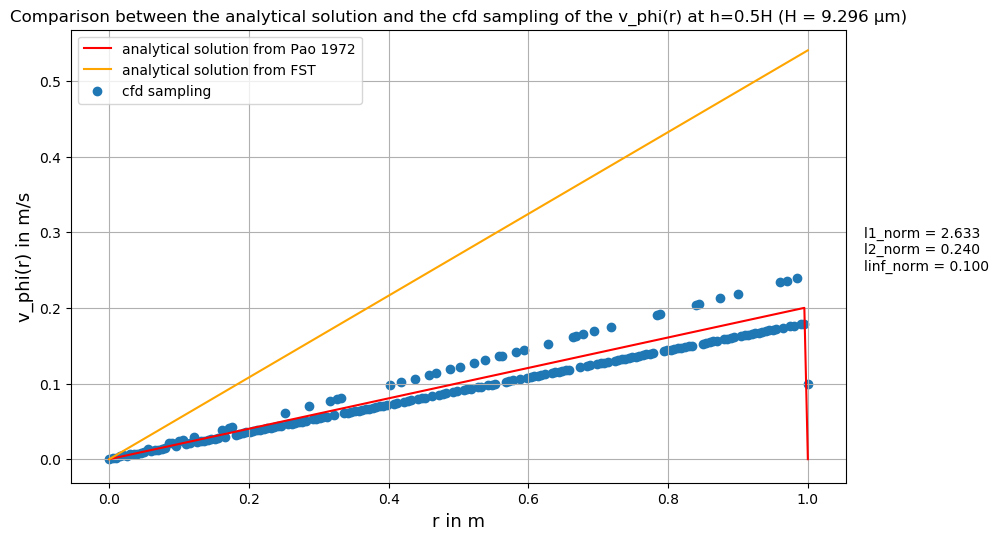

In [79]:
#show the comparisons of the analytical solutions and the cfd sampling of the v_phi(r)
velocity_cfd = velocity_cfd.reshape(1, 20, 200)
#velocity_cfd[velocity_cfd>1] = 0
#velocity_cfd[velocity_cfd<0] = 0

for item_height in range(20):
    
    z = 0.5*H_series[item_height]/R  #dimensionless z
    v_phi_r_exact = rdf.rotatingflow(r, z, R, H_series[item_height], omega)
    v_phi_r_exact_FST = omega*r*(z+H_series[item_height]/R)*R**2/(H_series[item_height]+lambda1+lambda2)   
    v_phi_r_cfd = velocity_cfd[0][item_height]
    
    l1_norm = sum(abs(v_phi_r_exact - v_phi_r_cfd))
    l2_norm = np.sqrt(sum((v_phi_r_exact - v_phi_r_cfd)**2))
    linf_norm = max(abs(v_phi_r_exact - v_phi_r_cfd))

    fig = plt.figure(dpi=100, figsize=(10,6))
    plt.plot(r,v_phi_r_exact, color = 'red')
    plt.plot(r,v_phi_r_exact_FST, color = 'orange')
    plt.scatter(r, v_phi_r_cfd)
    plt.text(1.08, 0.25, 'l1_norm = %.3f \nl2_norm = %.3f \nlinf_norm = %.3f'%(l1_norm, l2_norm, linf_norm))
    plt.title('Comparison between the analytical solution and the cfd sampling of the v_phi(r) at h=0.5H (H = %.3f μm)'%(H_series[item_height]*1e6))
    plt.xlabel('r in m', fontsize = 13)
    plt.ylabel('v_phi(r) in m/s', fontsize = 13)
    plt.legend(['analytical solution from Pao 1972 (reference at the beginning)', 'analytical solution from FST (page 574)', 'cfd sampling']) #_coarse', 'cfd sampling_fine'
    plt.grid()